In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv(r"E:\Data Science\E. Machine Learning\Projects\Black Friday Project\Black_Friday_train.csv")

In [3]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.shape

(550068, 12)

In [6]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# find unique values
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Text(0.5, 1.0, 'Purchase amount Distribution')

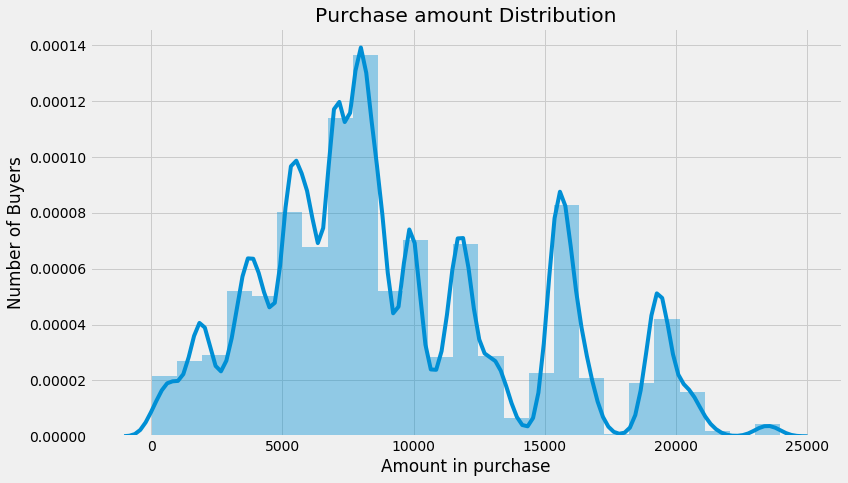

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df['Purchase'], bins = 25)
plt.xlabel('Amount in purchase')
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

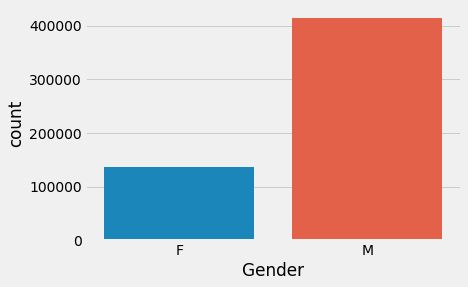

In [9]:
sns.countplot(df['Gender'])

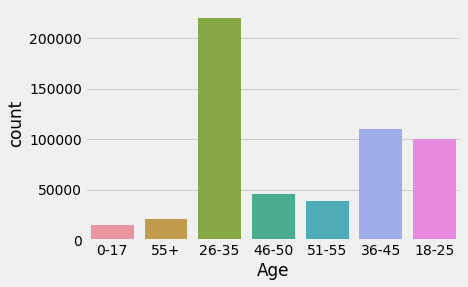

In [10]:
sns.countplot(df['Age'])

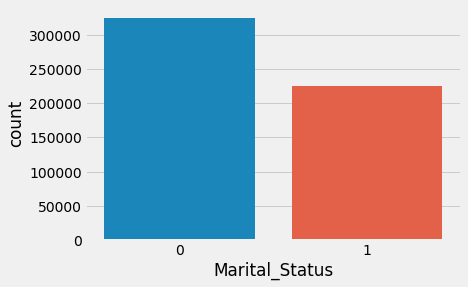

In [11]:
sns.countplot(df['Marital_Status'])

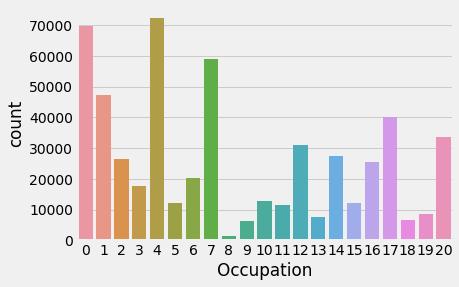

In [12]:
sns.countplot(df['Occupation'])

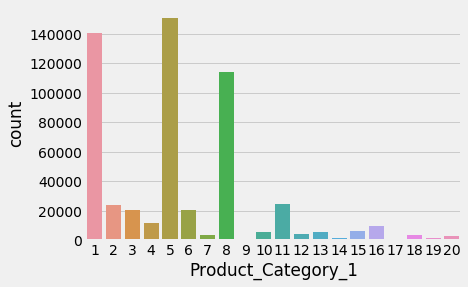

In [13]:
sns.countplot(df['Product_Category_1'])

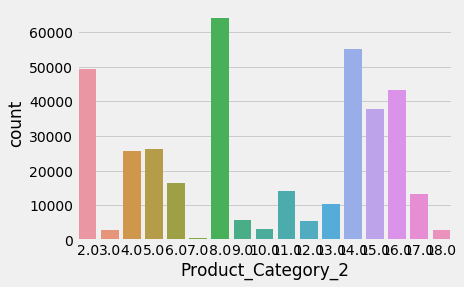

In [14]:
sns.countplot(df['Product_Category_2'])

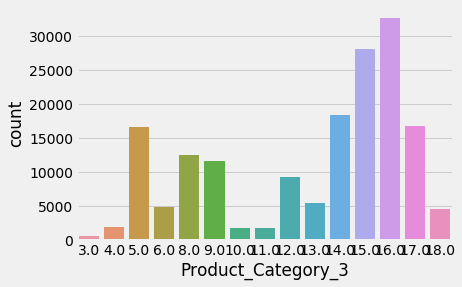

In [15]:
sns.countplot(df['Product_Category_3'])

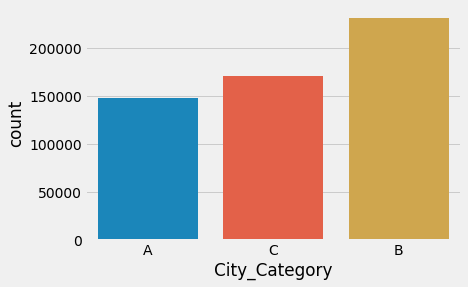

In [16]:
sns.countplot(df['City_Category'])

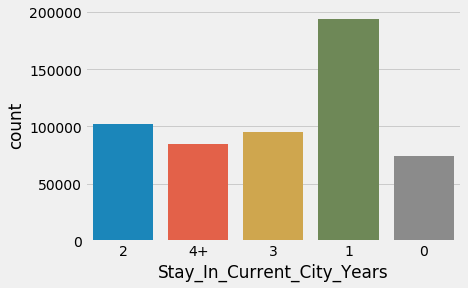

In [17]:
sns.countplot(df['Stay_In_Current_City_Years'])

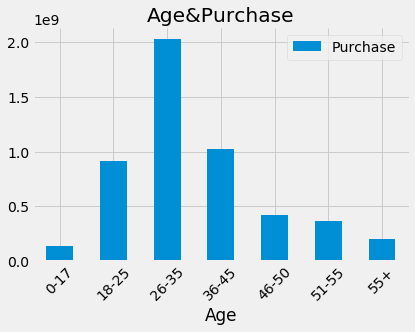

In [18]:
df.groupby(["Age"]).sum()[["Purchase"]].plot.bar(title="Age&Purchase")
plt.xticks(rotation=45)
sns.despine()

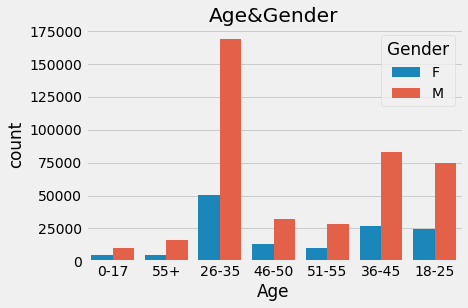

In [19]:
sns.countplot(df["Age"], hue=df["Gender"]).set_title("Age&Gender")
sns.despine()

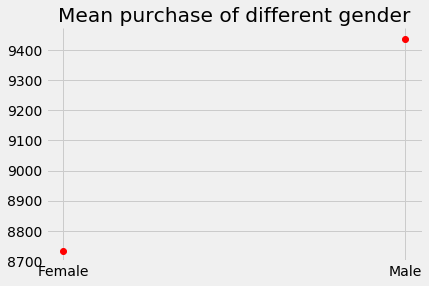

In [20]:
x = df.groupby(["Gender"]).mean()[["Purchase"]].index
y = df.groupby(["Gender"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.xticks(x, ["Female", "Male"])
plt.title("Mean purchase of different gender")
sns.despine()

From the age and gender figures, we can see several interesting things. First of all, the main customers for black friday sale are male(over 70 percent), especially those of age 26-35, who account for almost one third of male cuntomers of all ages. Secondly, the figure of mean purchase of different gender shows that individual female customer generally spend more(about $30k more) that their male counterpart. In spite of gender, people between age of 18 and 45 have made up almost four fifths(4 billion) of black friday sales. Young men showed greater purchasing power overall, but it's also possible that male customers are paying when shopping together with females.

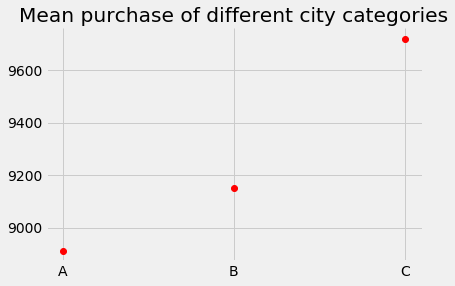

In [21]:
x = df.groupby(["City_Category"]).mean()[["Purchase"]].index
y = df.groupby(["City_Category"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.title("Mean purchase of different city categories")
sns.despine()

Customers from C_category cities make up more than half of our black friday sales. Surprisingly, although there are not very many customers from B_type city, they relatively spend about $45K more than other customers in each puachase. On the contrary, we didn't get very many customers from A_type city and they spent the least in our store. This should be noted when making future marketing plans. In later sections, we will explore more details about what they buy.

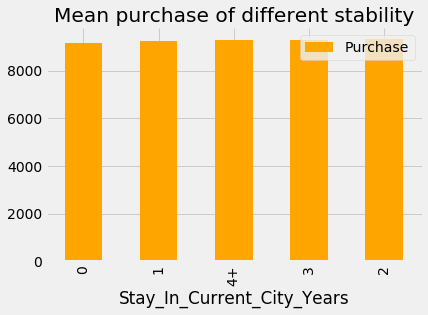

In [22]:
df.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].sort_values(by="Purchase").plot.bar(title="Mean purchase of different stability", color="orange")
sns.despine()

New residents(one year or less) consist of around half of our black friday customers, which shows that we appear to be more popular for new comers. People who have been living in current city for longer spend a bit more than new comers. Since they chose to stay with us, we do need to find out what kept them loyal so we can make better plans to keep more customers instead of losing them over time.

In [ ]:
df.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="grey")
sns.despine()

In [ ]:
df.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.line(title="Gender&Product")
sns.despine()

In [ ]:
df.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Gender&Product")
sns.despine()

Products under category 2 are our most popular items, and this is true for all kinds of customers coming from different backgrounds.

Above is some analysis about trends of our black friday sale as well as correlations between different demograghical features and purchase, these relationships can be valuable when trying to maximize profit. Now we will try to predict future sales with these data.

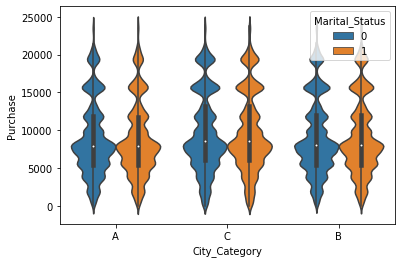

In [3]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=df)

Analysis of Purchase capacity as a function of Marital Status across city categories does not show a definitive trend. It would lead to a lot of assumptions and might lead to wrong conlcusions.

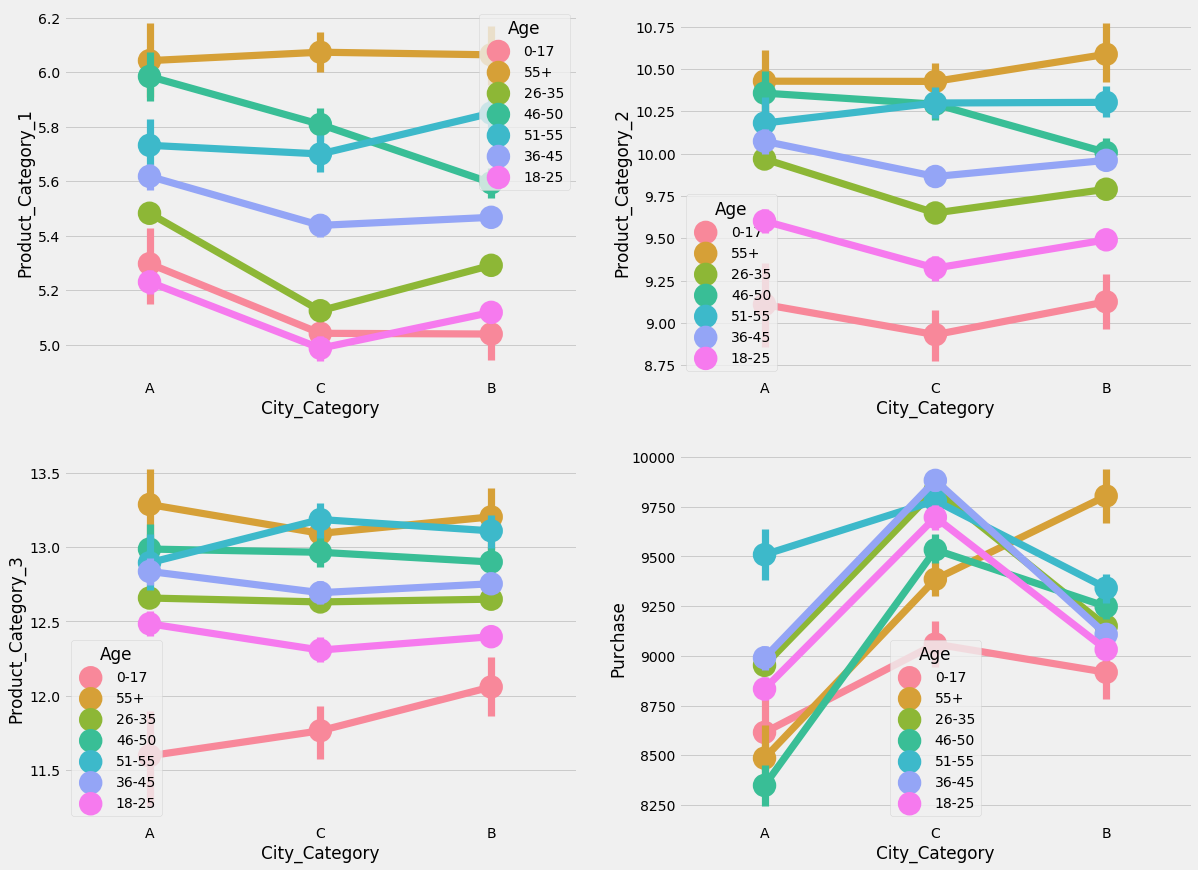

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,1]
                )

The stark difference in the purchase acoss City_Categories for the Age Group of 55 and above. It is highest in City_Category_B, as compared to the other age groups which tend to show high purchase in City_Category_C.

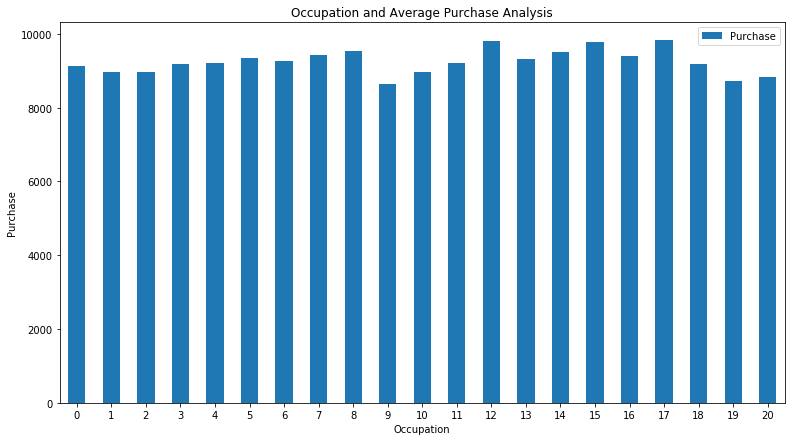

In [3]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Average Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

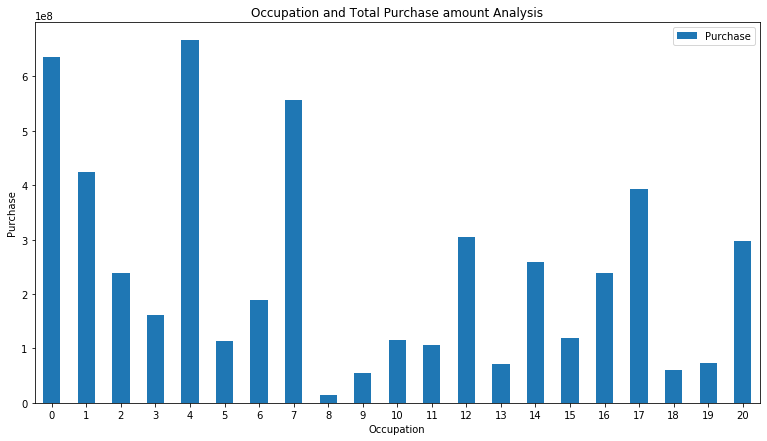

In [4]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.sum)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Total Purchase amount Analysis")
plt.xticks(rotation=0)
plt.show()

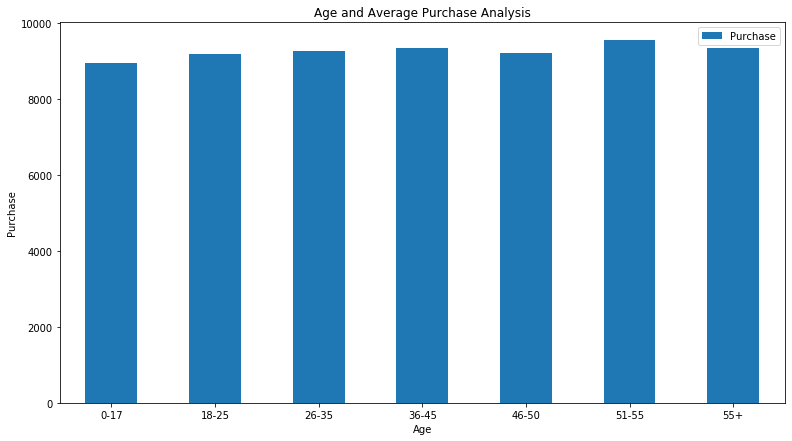

In [5]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Average Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

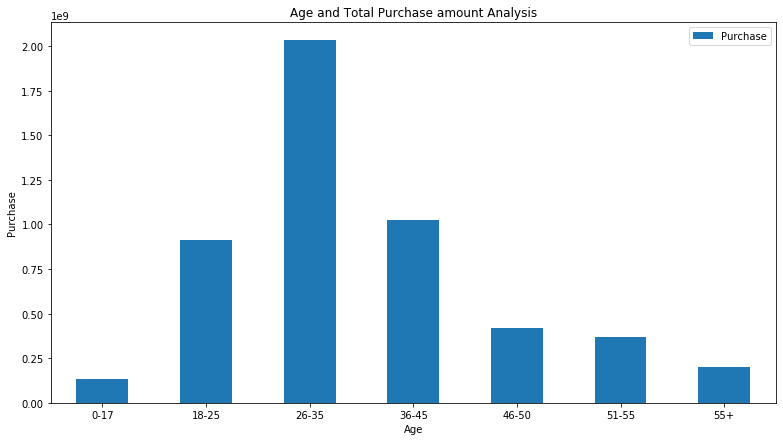

In [6]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.sum)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Total Purchase amount Analysis")
plt.xticks(rotation=0)
plt.show()

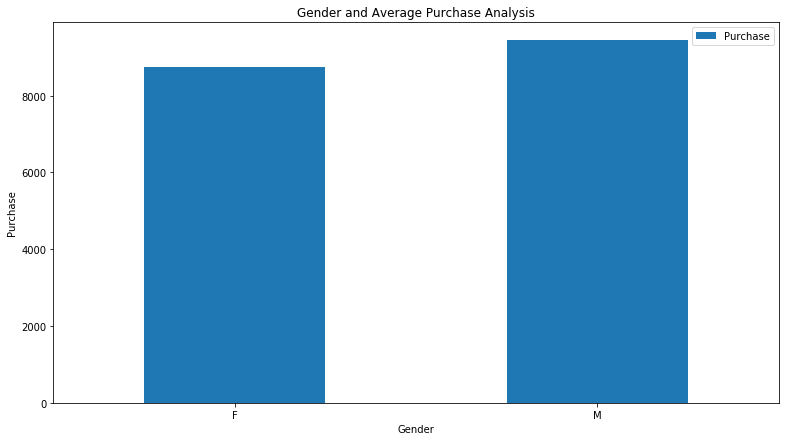

In [7]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Average Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

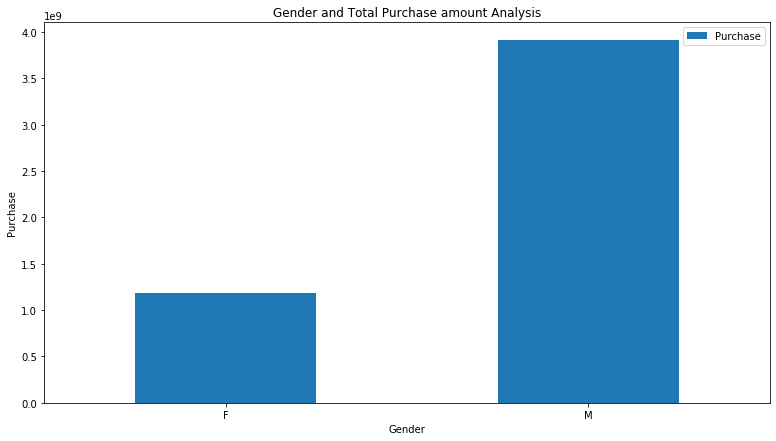

In [8]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.sum)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Total Purchase amount Analysis")
plt.xticks(rotation=0)
plt.show()

# Preprocessing

In [9]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [19]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,-2.0,-2.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,-2.0,-2.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,-2.0,-2.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,-2.0,-2.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,-2.0,-2.0,365


In [ ]:
df.isnull().sum()

### Outlier Detection and Treatment

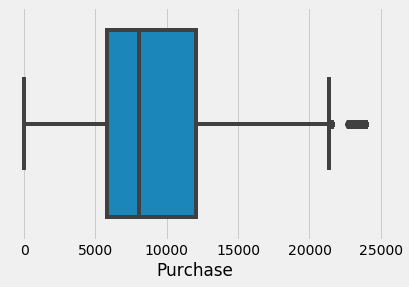

In [21]:
sns.boxplot(df['Purchase'])

In [13]:
#Outlier removal for "Purchase"
percentile25 = df['Purchase'].quantile(0.25)
percentile75 = df['Purchase'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
df=df[(df['Purchase']>lower_limit) & (df['Purchase']<upper_limit)]

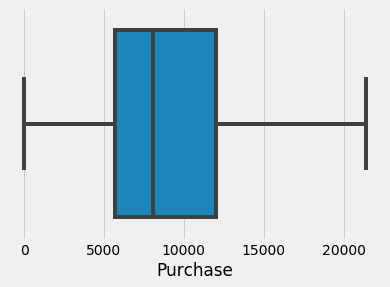

In [26]:
sns.boxplot(df['Purchase'])

Text(0.5, 1.0, 'Purchase amount Distribution')

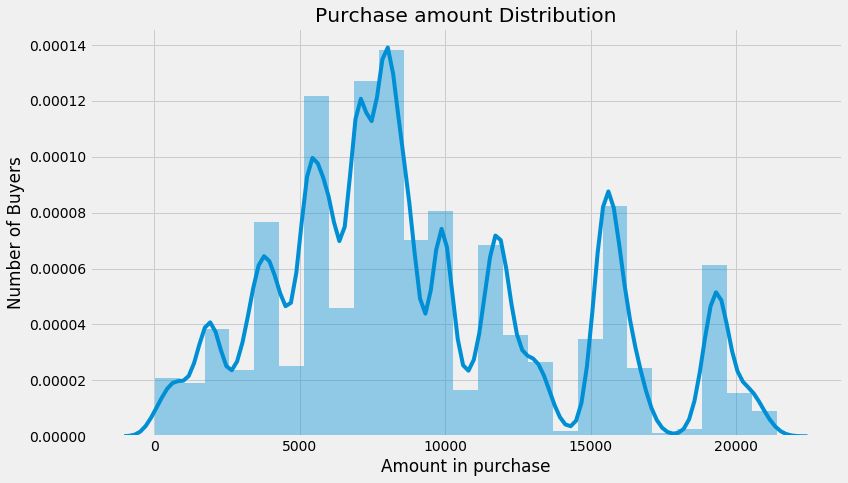

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df['Purchase'], bins = 25)
plt.xlabel('Amount in purchase')
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

(7.0, 0.0)

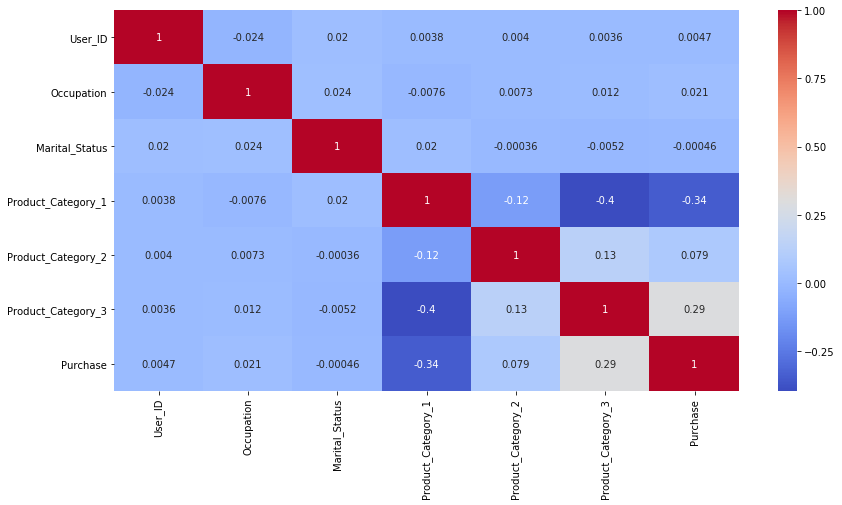

In [12]:
corr = df.corr()
plt.figure(figsize=(14,7))
ax=sns.heatmap(corr, annot=True, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim((bottom+0.5), (top-0.5))


From the heatmap above we can observe there are strong correlations between different types' products and purchase. There is also some correlation between age and marital status which is in line with common sense. Unfortunately, there is no single feature that shows strong correlation with purchase directly, so we can understand this as that purchase depends on the ensemble of all features.

In [14]:
cols=['Gender','Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in cols:
    dummy=pd.get_dummies(df[col],drop_first=True,prefix=col)
    df=pd.concat([df,dummy],axis=1)
    del df[col]
    print(col)
del dummy

Gender
Age
City_Category
Stay_In_Current_City_Years


In [ ]:
df.head(10)

In [15]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

In [16]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

Results
MSE: 4505.897966107468
CV Score: 4501.015110119173


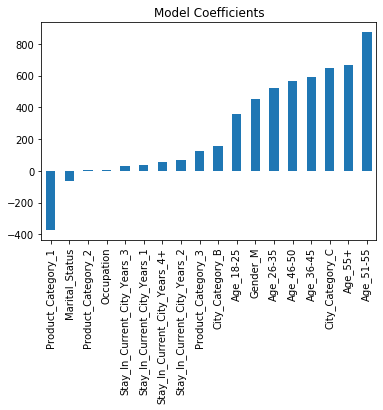

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3327.782960658725
CV Score: 3313.401529567455


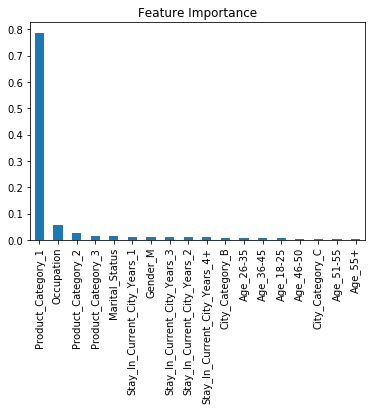

In [18]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3042.671349563994
CV Score: 3033.229337898745


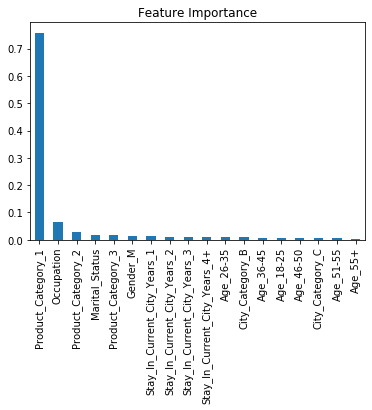

In [20]:
model = RandomForestRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

from sklearn.ensemble import RandomForestRegressor
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,30],
              "bootstrap": [True, False],
                'criterion':['mae','mse'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }
n_iter_search = 150
reg = RandomForestRegressor(verbose=1,n_jobs=-1)

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(reg, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='neg_mean_absolute_error',cv=7)
train(random_search, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')